<a href="https://colab.research.google.com/github/PratyushaChatterjee/DL-and-NN-Project/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import io
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# loading the data to a Pandas DataFrame

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ML/K-Means Assignment.csv')
# print first 5 rows of the dataset
data.head()

,A0,A1,A2,y
0,2067.582042,-15.259519,0.020472,2
1,1319.589579,-18.412320,0.521308,0
2,1170.212183,-19.470602,0.814986,0
3,1424.162191,9.867841,0.848751,1
4,1551.069098,11.809364,0.884964,1


# separate the target variable from the features

In [ ]:

X = data.iloc[:, :-1].values


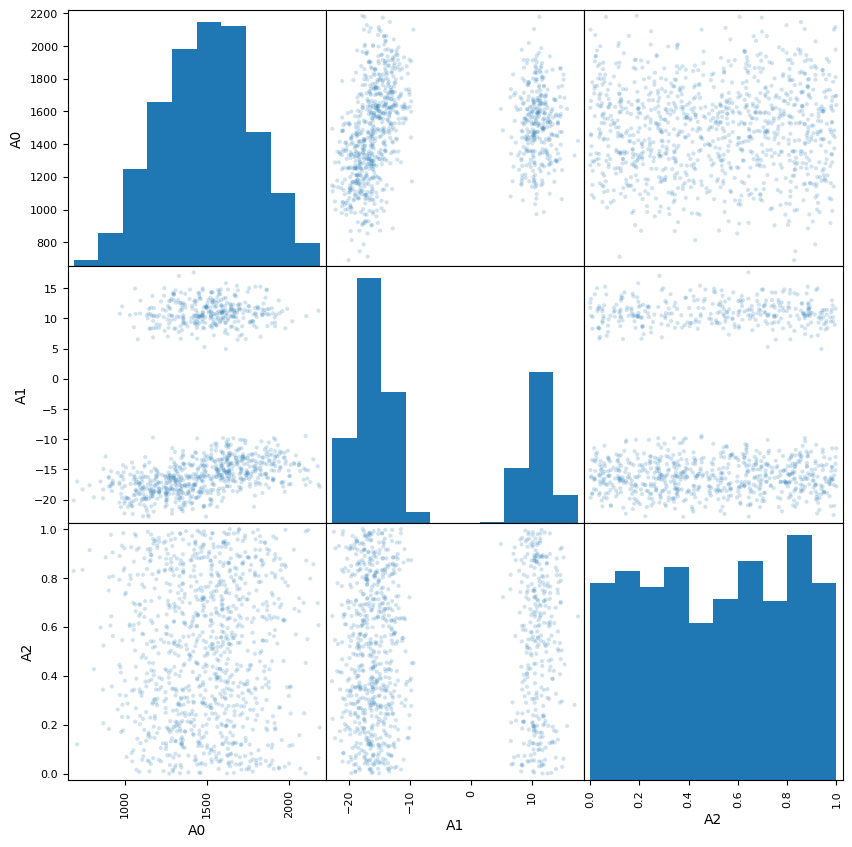

In [ ]:
#Make pair-plots of the predictor variables
pd.plotting.scatter_matrix(data.iloc[:, :-1], alpha=0.2, figsize=(10, 10))
plt.show()


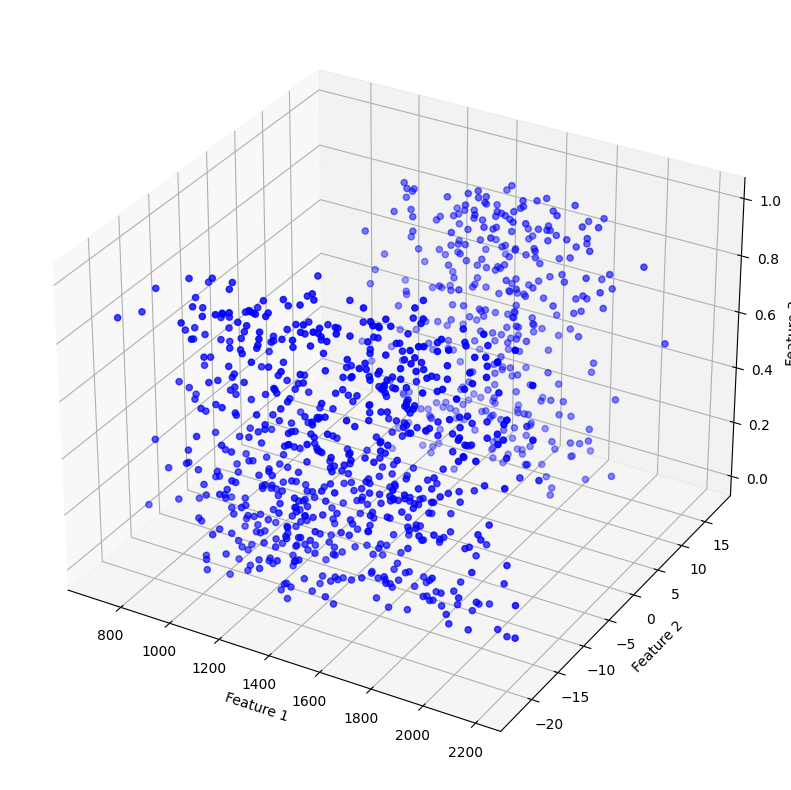

In [ ]:
# Task 3: Plot the data in 3-D
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

# scale the features

In [ ]:

sc = StandardScaler()
X = sc.fit_transform(X)

# Determine the optimal number of clusters using the silhouette score

In [ ]:

from sklearn.metrics import silhouette_score

silhouette_scores = []

In [ ]:
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(score)
  print(f"Silhouette score for k={k}: {score:.4f}")

Plot the silhouette scores

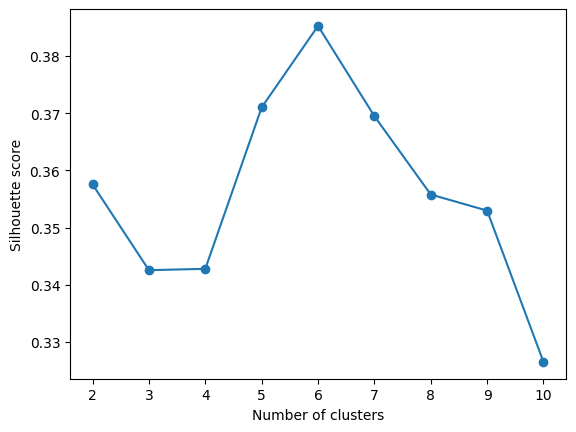

In [ ]:

import matplotlib.pyplot as plt

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


# Fit the final K-Means model with the optimal number of clusters

In [ ]:

n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
kmeans.fit(X)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
# assign cluster labels to each data point
labels = kmeans.labels_

# Create pair-plots of the predictor variables

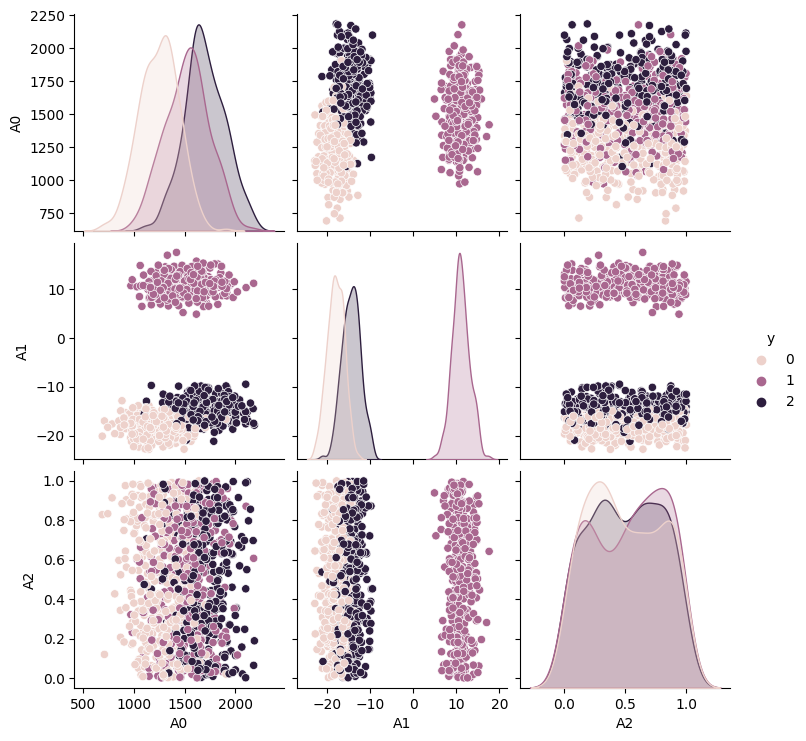

In [ ]:

sns.pairplot(data=data, hue='y')
plt.show()

# Create a 3-D scatter plot of the data

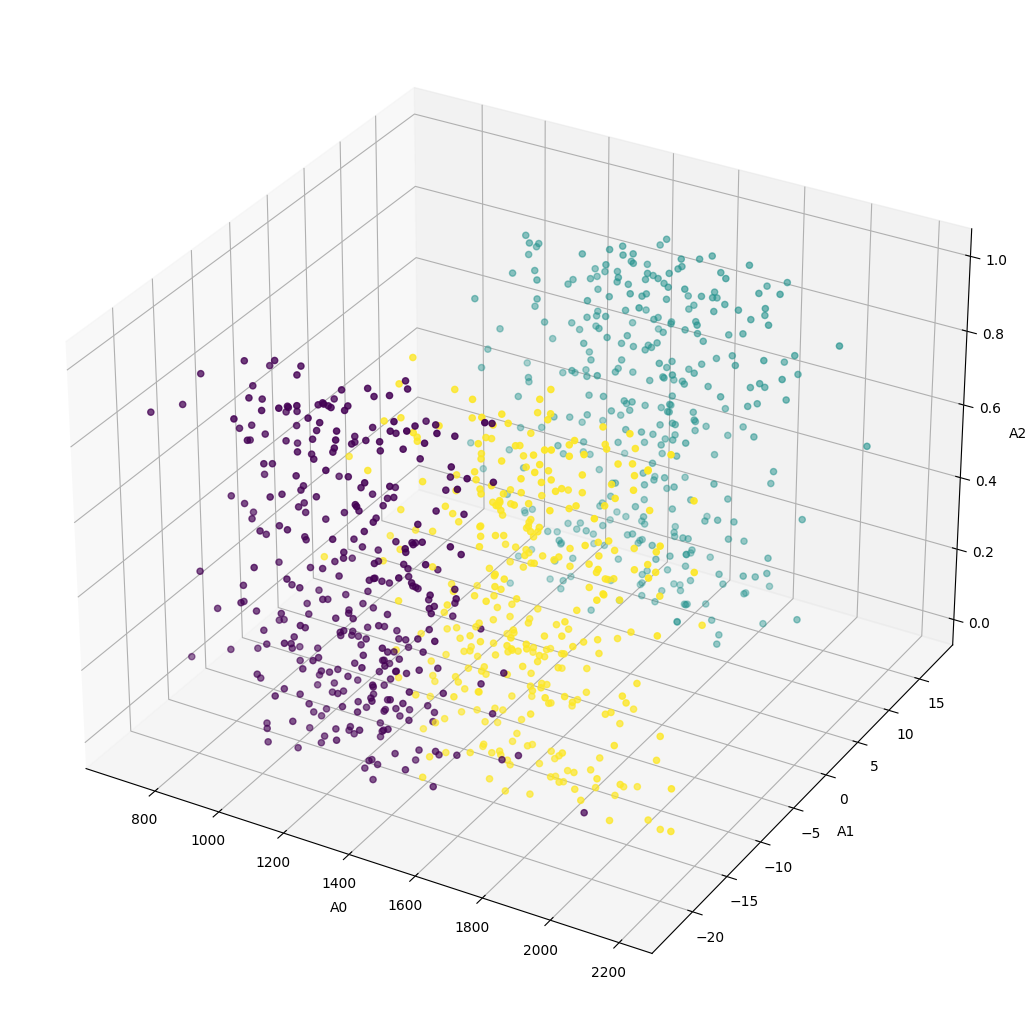

In [ ]:

fig = plt.figure(figsize=(13, 29))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['A0'], data['A1'], data['A2'], c=data['y'])
ax.set_xlabel('A0')
ax.set_ylabel('A1')
ax.set_zlabel('A2')
plt.show()

# Check for duplicate rows

In [ ]:

print(data.duplicated().sum())

# separate the target variable from the features
y = data.iloc[:, :-1].values

# scale the features
sc = StandardScaler()
y = sc.fit_transform(y)
print('y')

0
y


The result
matching with visual perception as noted in Point 2 and 3.